In [1]:
from simplex import Simplex_CLASS
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transform

In [2]:
from Simplex import noise, generate_noise

In [3]:
Simplex_instance = Simplex_CLASS()

In [4]:
def generate_simplex_noise(
        Simplex_instance, x, t, random_param=False, octave=6, persistence=0.8, frequency=64,
        in_channels=4
        ):
    noise = torch.empty(x.shape).to(x.device)
#     print("x", x.shape)
#     print("noise", noise.shape)
    for i in range(in_channels):
        Simplex_instance.newSeed()
        if random_param:
            param = random.choice(
                    [(2, 0.6, 16), (6, 0.6, 32), (7, 0.7, 32), (10, 0.8, 64), (5, 0.8, 16), (4, 0.6, 16), (1, 0.6, 64),
                     (7, 0.8, 128), (6, 0.9, 64), (2, 0.85, 128), (2, 0.85, 64), (2, 0.85, 32), (2, 0.85, 16),
                     (2, 0.85, 8),
                     (2, 0.85, 4), (2, 0.85, 2), (1, 0.85, 128), (1, 0.85, 64), (1, 0.85, 32), (1, 0.85, 16),
                     (1, 0.85, 8),
                     (1, 0.85, 4), (1, 0.85, 2), ]
                    )
            # 2D octaves seem to introduce directional artifacts in the top left
            noise[:, i, ...] = torch.unsqueeze(
                    torch.from_numpy(
                            # Simplex_instance.rand_2d_octaves(
                            #         x.shape[-2:], param[0], param[1],
                            #         param[2]
                            #         )
                            Simplex_instance.rand_3d_fixed_T_octaves(
                                    x.shape[-2:], t.detach().cpu().numpy(), param[0], param[1],
                                    param[2]
                                    )
                            ).to(x.device), 0
                    ).repeat(x.shape[0], 1, 1, 1)
#         print(f"i and in_channels {i} / {in_channels}")
#         print("noise shape", noise.shape)
#         print("t shape", t.shape)
        noise[:, i, ...] = torch.unsqueeze(
                torch.from_numpy(
                        # Simplex_instance.rand_2d_octaves(
                        #         x.shape[-2:], octave,
                        #         persistence, frequency
                        #         )
                        Simplex_instance.rand_3d_fixed_T_octaves(
                                x.shape[-2:], t.detach().cpu().numpy(), octave,
                                persistence, frequency
                                )
                        ).to(x.device), 0
                ).repeat(x.shape[0], 1, 1, 1)
    return noise

In [5]:
octave=8
persistence=0.8
frequency=2
in_channels = 1
num_timesteps = 1000

In [6]:
def plot_tensor(tensor):
    array = tensor.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap='gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()
#     return array

In [7]:
# Open the PNG image using PIL
path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\train\good\No21.png"
input_size = 32
image = Image.open(path)
image = np.array(image)
image = Image.fromarray(image)
image = transform.Resize((input_size, input_size))(image)
image = transform.ToTensor()(image)
x = image.unsqueeze(dim = 0)

In [8]:
simplex = Simplex_CLASS()
# x = torch.rand(1, in_channels, 64, 1, 64)

In [9]:
t = torch.randint(0, num_timesteps, (x.shape[0],), device=x.device)

In [10]:
t

tensor([410])

In [11]:
x.shape

torch.Size([1, 1, 32, 32])

In [12]:
noise = generate_simplex_noise(simplex, x=x, t=t, in_channels=in_channels, octave = octave, persistence= persistence, frequency= frequency)

In [13]:
noise.shape

torch.Size([1, 1, 32, 32])

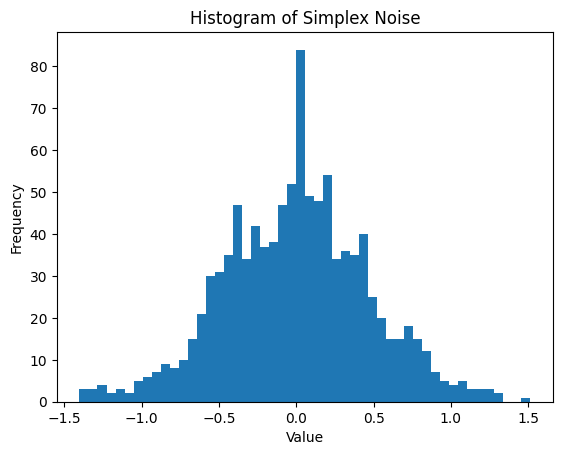

In [14]:
# Generate random noise
noise = noise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Simplex Noise')
plt.show()

In [15]:
# plot_tensor(noise[0])

In [16]:
x = x.unsqueeze(-1)

In [17]:
x.shape

torch.Size([1, 1, 32, 32, 1])

In [18]:
noise = generate_noise.generate_simplex_4noise(x, t, in_channels=in_channels, octave=8, persistence= persistence, frequency= frequency)

TypeError: generate_simplex_4noise() missing 1 required positional argument: 't'

In [ ]:
t[0].numpy().size

In [ ]:
noise.shape

In [ ]:
noise.squeeze(3).shape

In [ ]:
plot_tensor(noise.squeeze(-1)[0])

In [ ]:
# Generate random noise
noise = noise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Simplex Noise')
plt.show()

In [ ]:
# image.shape

In [ ]:
# plt.imshow(noise[0])

In [ ]:
# noise = noise.flatten()

In [ ]:
noise.shape

In [ ]:
# Generate random noise
noise = noise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Simplex Noise')
plt.show()

In [ ]:
noise.mean()

In [ ]:
noise.var()

In [ ]:
# x= torch.rand(1, 2, 32, 32)

In [ ]:
noise_fn = lambda x, t: torch.randn_like(x)

In [ ]:
g_noise =  noise_fn(x, t)

In [ ]:
g_noise.shape

In [ ]:
# Generate random noise
g_noise = g_noise.flatten().numpy()
# Plot the histogram
plt.hist(g_noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Noise')
plt.show()

In [ ]:
g_noise.mean()

In [ ]:
g_noise.var()

In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Generate two example distributions
dist1 = noise
dist2 = g_noise

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(dist1, dist2)

print("Kolmogorov-Smirnov statistic:", statistic)
print("p-value:", p_value)

In [ ]:
from opensimplex import OpenSimplex

def generate_simplex_noise_3d(width = 64, height = 64, depth = 64, T = 10, scale = 0.1, octaves = 6, persistence = 0.8, lacunarity = 2):
    simplex = OpenSimplex(seed=100)

    noise = [[[[0 for _ in range(depth)] for _ in range(height)] for _ in range(width)] for _ in range(T)]
    print(len(noise))
    for t in range(T):
        for z in range(depth):
            for y in range(height):
                for x in range(width):
                    amplitude = 1
                    frequency = 1
                    value = 0

                    for _ in range(octaves):
                        nx = x / scale * frequency
                        ny = y / scale * frequency
                        nz = z / scale * frequency
                        nw = T / scale * frequency # Fourth dimension for 4D noise

                        value += simplex.noise4array(nx, ny, nz, nw) * amplitude

                        amplitude *= persistence
                        frequency *= lacunarity

                    noise[t][x][y][z] = value
    return noise

In [ ]:
simplex = OpenSimplex(seed=100)

In [ ]:
ix

In [ ]:
# rng = np.random.default_rng(seed=1)
# ix, iy, iz, iw = rng.random(2), rng.random(2), rng.random(2), rng.random(2)
# out = simplex.noise4array(ix, iy, iz, iw)
# # array([[[[0.30334626, 0.29860705],
# #          [0.28271858, 0.27805178]],
# #         [[0.26601215, 0.25305428],
# #          [0.23387872, 0.22151356]]],
# #        [[[0.3392759 , 0.33585534],
# #          [0.3343468 , 0.33118285]],
# #         [[0.36930335, 0.36046537],
# #          [0.36360679, 0.35500328]]]])

In [ ]:
out

In [ ]:
def rand_4d_fixed_T_octaves(self, shape, T, octaves=1, persistence=0.5, frequency=32):
    """
    Returns a layered fractal noise in 3D

    :param shape: Shape of 3D tensor output
    :param octaves: Number of levels of fractal noise
    :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
    :param frequency: Frequency of initial octave of noise
    :return: Fractal noise sample with n lots of 2D images
    """
    assert len(shape) == 3
    noise = np.zeros((1, *shape))
    z, y, x = [np.arange(0, end) for end in shape]
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * self.noise4array(x / scale * frequency, y / scale * frequency, z / scale * frequency, T / scale * frequency)
        frequency /= 2
        amplitude *= persistence
    return noise    

In [ ]:
shape = (64, 64, 64)

In [ ]:
z, y, x = [np.arange(0, end) for end in shape]

In [ ]:
noise = generate_simplex_noise_3d(width = 32, height = 32, depth = 1, T = 1)

In [ ]:
noise = torch.tensor(noise)

In [ ]:
plot_tensor(noise.squeeze(-1))

In [ ]:
noise.shape

In [ ]:
octaves_list = [i for i in ]

In [ ]:
noise = noise.flatten().numpy()

In [ ]:
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Noise')
plt.show()

In [ ]:
x= np.random.randn(10)

In [ ]:
x

In [ ]:
scale = 0.1
frequency = 32

In [ ]:
x / scale * frequency

In [ ]:
x / frequency

In [ ]:
torch.sq